In [1]:
import pandas as pd


In [2]:
df_news=pd.read_csv("Combined_News_DJIA.csv")
df_news['Date']=pd.to_datetime(df_news['Date'])

In [3]:
df_price=pd.read_csv("new_djprice.csv")
df_price.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score
0,2008-07-07,11289.19,11399.11,11120.74,11231.96,11231.96,248240000.0,NaN,NaN
1,2008-07-08,11225.03,11391.13,11174.88,11384.21,11384.21,271500000.0,0.013555,NaN
2,2008-07-09,11381.93,11418.24,11141.99,11147.44,11147.44,227100000.0,-0.020798,NaN
3,2008-07-10,11148.01,11270.30,11086.95,11229.02,11229.02,248010000.0,0.007318,NaN
4,2008-07-11,11226.17,11241.07,10977.68,11100.54,11100.54,275010000.0,-0.011442,NaN


In [4]:
df_price['Date']=pd.to_datetime(df_price['Date'])
df_price

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score
0,2008-07-07,11289.19,11399.11,11120.74,11231.96,11231.96,248240000.0,NaN,NaN
1,2008-07-08,11225.03,11391.13,11174.88,11384.21,11384.21,271500000.0,0.013555,NaN
2,2008-07-09,11381.93,11418.24,11141.99,11147.44,11147.44,227100000.0,-0.020798,NaN
3,2008-07-10,11148.01,11270.30,11086.95,11229.02,11229.02,248010000.0,0.007318,NaN
4,2008-07-11,11226.17,11241.07,10977.68,11100.54,11100.54,275010000.0,-0.011442,NaN
...,...,...,...,...,...,...,...,...,...
3770,2023-06-28,33881.38,33903.76,33755.92,33852.66,33852.66,268050000.0,-0.002184,0.583472
3771,2023-06-29,33854.57,34147.68,33828.63,34122.42,34122.42,279940000.0,0.007969,1.244567
3772,2023-06-30,34269.92,34467.35,34269.92,34407.60,34407.60,351060000.0,0.008358,1.887133
3773,2023-07-03,34369.78,34465.60,34286.54,34418.47,34418.47,157590000.0,0.000316,1.840525


In [5]:
df_master=df_price.merge(df_news, how='left', on='Date')

In [6]:
df_master
df_master=df_master.dropna()
df_master
len(df_master)/252

7.773809523809524

In [7]:
# lets add any significant and then lets check the sentiment

In [8]:
def extract_headline(row_data):
    """
    row_data=df_sig_news.iloc[row_index, :]
    """
    master_string=[str(i+1)+" : "+str(row_data[10:][i]) for i in range(0, len(row_data[10:]))]
    master_string="\n".join(master_string)
    return master_string

In [9]:
#this is what we had from last time

important_issues=['oil', 'bank','military', 'russia', 'middle-east war', 'war', 'china economy', 'market price', 'nuclear war']

In [10]:
df_master['significance']=0
df_master.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,significance
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,b'1st anniversary of the beginning of the Saff...,b'Russian stock market falls 17%',b'Car bombs at U.S. embassy in Yemen kill 16',"b""CIA: Bin Laden doesn't oversee day-to-day al...",b'WTF? Six Brazilian politicians legally chang...,b'Tony Blair to appear on The Daily Show with ...,"b'At least 100 rapes in Karachi,Pakistan a day'",b'US footage of attack that killed Pakistani s...,"b""Potential HBOS- Lloyds merger 'bad news for ...",0
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,b'CIA Chief Speaks of Trying to Provoke Terror...,"b'German Authorities Wiretap Skype, Raid Homes...","b'In Yemen, a Planned Massacre of Americans Is...",b'Livni sweeps Kadima race; Olmert pledges coo...,b'Rising prices tip another 75 million towards...,"b""Sri Lanka's navy says it has fought a sea ba...",b'official poverty rates of 51.8% in Gaza and ...,b'India deploys planes with Nuclear Capability...,b'Tariq Ali: Has the U.S. Invasion of Pakistan...,0
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,b'Rice says U.S. will resist Russian moves aga...,b'14 men rob a coca cola factory - shoot out w...,"b'South Ossetia information warfare, two sides...",b'North Korea preparing to restart nuclear rea...,b' Venezuela expels U.S. rights group for crit...,b'Chavez expells Human Rights Watch from Venez...,b'Euthanasia advocate takes her own life.',"b""The complete list of the world's billionaires""","b""Swaziland's HIV/AIDS treatment crisis goes c...",0
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,b'Dig pinpoints Stonehenge origins',"b'Almost 13,000 Chinese children sickened by t...","b""Pakistan's rulers were supposed to be in Hot...","b'Turkey scared to admit Armenian genocide, sa...","b""Change in dinner plans saved Pakistan's rule...",b'Pakistani troops fire on intruding U.S. chop...,b'Heads are starting to role in China as the t...,b'Russian ambassador: Czechs selling security ...,"b""Merchant of Death appears in Thai court, no ...",0
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,"b""Russia engages in 'gangland' diplomacy as it...","b""EU patent office on strike: 'the organisatio...",b'Mystery surrounds hijacked Iranian ship',b' U.S.-led wars behind Wall Street crisis: Ah...,b'Pakistan blames US raids for hotel bombing',b'Double Darwin Award? A couple having sex on ...,b'Tourists Taken Hostage in Egypt - Relocated ...,"b'Bush, Ahmadinejad To Speak At UN '",b'Workers Allegedly Beat CEO To Death In India',0


In [11]:
#just to match against keywords
for i in range(0,len(df_master)):
    master_string=extract_headline(df_master.iloc[i, :])
    if any(item in master_string.lower() for item in important_issues):
        df_master.loc[i, 'significance']=sum(item in master_string.lower() for item in important_issues)

In [12]:
df_master['significance'].describe()

count    2013.000000
mean        2.595132
std         1.150035
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: significance, dtype: float64

In [13]:
# lets decide that the threshold is going to be 4
threshold=4


In [14]:
import openai
f = open("secret_key.env.txt", "r")
secret_key=f.read()
openai.api_key=secret_key

In [15]:
def openai_prompt(prompt):
    completion = openai.Completion.create(model="text-davinci-003", prompt=prompt)
    response=completion.choices[0].text
    return response

In [16]:
start_prompt="based on the below list of headline news, tell me if the overall sentiment of the entire list is positive or negative"
end_prompt="for positive sentiment, please reply 1. For negative sentiment, please reply -1, otherwise, just reply 0. Do not apply anything other than -1, 1, or 0"

In [21]:
#run it a bit in order to see the varaible in output
df_master['sentiment']=0
for i in range(0,len(df_master)):
    if df_master.loc[i, 'significance']>threshold:
        print ("i is ", i)
        master_string=extract_headline(df_master.iloc[i, 10:35])
        mid_prompt=master_string
        prompt=start_prompt+"\n\n"+mid_prompt+"\n\n"+end_prompt
        response=openai_prompt(prompt)
        df_master.loc[i, 'sentiment']=response
        print (response)


i is  17
.

-1
i is  63
. 

-1
i is  133


-1
i is  165
.

-1
i is  264


-1
i is  265
.

The overall sentiment of the entire list is 0.
i is  319


KeyboardInterrupt: 

In [18]:
#df_master['sentiment'].to_csv("sample.txt")

In [22]:
#we are gonna take a look at this sample, by looking at the file directly
sentiment=pd.read_csv("sample.txt", index_col=0)
display(sentiment)

,sentiment
51,0
52,0
53,0
54,0
55,0
...,...
49,0
50,0
301,0
372,0


**one solution does't work, lets head to the playground https://platform.openai.com/playground to see how it should work  20mins on langhcian issues**

**all the script for openai https://docs.google.com/document/d/1DSwrFViMLUos7eSvhUKVPptndd1SShLm03WA80PYzxk/edit?usp=sharing**

**Sequential chain model: https://python.langchain.com/docs/modules/chains/foundational/sequential_chains**

In [2]:
#pip install langchain

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached langchain-0.0.268-py3-none-any.whl (1.5 MB)
  Using cached async_timeout-4.0.3-py3-none-any.whl (5.7 kB)
     |████████████████████████████████| 101 kB 3.5 MB/s            
     |████████████████████████████████| 2.1 MB 8.2 MB/s            
  Using cached pydantic-2.2.1-py3-none-any.whl (373 kB)
  Using cached dataclasses_json-0.5.14-py3-none-any.whl (26 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
  Using cached aiohttp-3.8.5-cp38-cp38-macosx_10_9_x86_64.whl (367 kB)
  Using cached PyYAML-6.0.1-cp38-cp38-macosx_10_9_x86_64.whl (191 kB)
  Using cached langsmith-0.0.25-py3-none-any.whl (33 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl

  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.6.3
    Uninstalling aiohttp-3.6.3:
      Successfully uninstalled aiohttp-3.6.3
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutil

In [17]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI



In [18]:
llm = ChatOpenAI(temperature=0, openai_api_key=secret_key)
#defline model and temperature

In [20]:
template1 = """Here is a list of most popular headlines on reddit:

{headline_content}

First, select at most top 5 most impactful headlines that can 
have impact on the financial market in United States, 
but ignore headlines news about specific companies, 
unless it is banking related with very big macro impact. 
The highest impact headlines are events 
that are highly speculative and out of market expectations. """


In [21]:
prompt_template = PromptTemplate(input_variables=["headline_content"], template=template1)


In [22]:
chain1 = LLMChain(llm=llm, prompt=prompt_template, 
                  output_key='summarized_headline') 
#because we have a couple chain


In [25]:
llm2 = ChatOpenAI(temperature=0,openai_api_key=secret_key)
template2 = """Rate the above headlines sentiment 
from -2 (most negative) to 2 (most positive).

{summarized_headline}

The final output will be a list, 
each value is the sentiment score per headline. 
For example [-1, -2, 0, 1, 2]"""


prompt_template2 = PromptTemplate(input_variables=["summarized_headline"], 
                                  template=template2)

chain2 = LLMChain(llm=llm2, prompt=prompt_template2)




In [28]:
from langchain.chains import SimpleSequentialChain
overall_chain = SimpleSequentialChain(chains=[chain1, chain2], verbose=True)

In [29]:
reddit_headlines= """
1 : Mecca under threat: Outrage at plan to destroy the birthplace of the Prophet Mohamed and replace it with a new palace and luxury malls
2 : Russia plans long-range bomber flights near U.S. shores
3 : Northern European nations to boost military cooperation against Russia
4 : Genitalia replaced with ducklings and dolphins in Turkish schoolbooks
5 : Chinese hack U.S. Weather systems, satellite network
6 : 2030 the "far distant future" says Australian Prime Minister Tony Abbott.
7 : Opium poppy cultivation in Afghanistan has reached a record high this year, a UN report has revealed, highlighting the failure of the US-led campaign to crack down on the lucrative crop.
8 : Protesters over missing students in Mexico burn state assembly: Demonstrators set fire to the local legislature building on Wednesday in the capital of the southwestern state of Guerrero in protests over the apparent massacre of 43 students by corrupt police and thugs from drug gangs.
9 : Iraqi Christian fighters retake town
10 : Israel announces it won't cooperate with UN Gaza probe
11 : Alberta fishermen land rare fossil of never-before-seen dinosaur
12 : Russian bomber patrols to reach Gulf of Mexico
13 : Shell ignored internal warnings over Nigeria oil spills, documents suggest | Documents filed at London high court suggest Shell didnt act on advice to fix aged pipeline and underplayed magnitude of two spills in Nigeria in 2008
14 : India wins U.S. support for food scheme, ends WTO blockade
15 : Russia denies NATO accusations over troops in Ukraine
"""

In [30]:
list_of_sentiment = overall_chain.run(reddit_headlines)

print (list_of_sentiment)




> Entering new SimpleSequentialChain chain...
Based on the given list, the top 5 most impactful headlines that can have an impact on the financial market in the United States are:

1. Russia plans long-range bomber flights near U.S. shores
2. Chinese hack U.S. Weather systems, satellite network
3. Opium poppy cultivation in Afghanistan reaches a record high
4. Shell ignored internal warnings over Nigeria oil spills
5. Russia denies NATO accusations over troops in Ukraine
[-2, -2, -1, -1, 0]

> Finished chain.
[-2, -2, -1, -1, 0]


**now that we've learned about sequential chain, lets run it with all the headlines**

In [33]:
import ast

def sequential_chat_response(overall_chain, headline_content, secret_key):

    list_of_sentiment = overall_chain.run(headline_content)
    print ("list of sentiment: ", list_of_sentiment)
    #take the average of the sentiment
    try:
        list_of_sentiment=ast.literal_eval(list_of_sentiment)
        list_of_sentiment=[int(x) for x in list_of_sentiment]
        avg_sentiment=sum(list_of_sentiment)/len(list_of_sentiment)
    except:
        print ("error message not able to find")
        avg_sentiment=0
    return avg_sentiment


In [35]:
# lets try sentiment round no.2
df_master['sentiment']=0
for i in range(0,len(df_master)):
    if df_master.loc[i, 'significance']>threshold:
        print ("i is ", i)
        master_string=extract_headline(df_master.iloc[i, 10:35])
        #will get converted to async
        response=sequential_chat_response(overall_chain, master_string, secret_key)
        df_master.loc[i, 'sentiment']=response


i is  17


> Entering new SimpleSequentialChain chain...
Based on the given list, the top 5 most impactful headlines that can have an impact on the financial market in the United States, excluding specific company news unless it is banking-related with significant macro impact, are:

1. "FTSE plunges 440pts in 10 minutes as markets around the world go into freefall again"
This headline indicates a significant drop in the FTSE index, which could signal a global market downturn. Such events can have a ripple effect on the US financial market.

2. "Nature loss 'dwarfs bank crisis'"
This headline highlights the magnitude of nature loss, which could have implications for various industries, including agriculture, energy, and insurance. The financial market may react to the potential economic consequences of this issue.

3. "Congressional leaders Harry Reid and Nancy Pelosi urged President Bush Thursday to call an emergency meeting with the G8 to address international financial instability."

KeyboardInterrupt: 

**this is quite slow, so lets make it async**

In [39]:
import asyncio
import time


In [40]:
#async would pause and until it finish the await function
async def get_sequential_chat_response(overall_chain, headline_content, 
                                       secret_key):

    list_of_sentiment = await overall_chain.arun(headline_content)
    print ("list of sentiment: ", list_of_sentiment)
    #take the average of the sentiment
    try:
        list_of_sentiment=ast.literal_eval(list_of_sentiment)
        list_of_sentiment=[int(x) for x in list_of_sentiment]
        avg_sentiment=sum(list_of_sentiment)/len(list_of_sentiment)
    except:
        print ("error message not able to find")
        avg_sentiment=999
    return avg_sentiment


In [38]:
#run it at your own peril, it is quite fast!
async def run_sequential_chat_response(df_master,secret_key, threshold=4):
    df_master['sentiment']=0
    tasks = []
    for i in range(0,len(df_master)):
        if df_master.loc[i, 'significance']>threshold:
            print ("i is ", i)
            master_string=extract_headline(df_master.iloc[i, 10:35]) #top 1 to top 25 columns
            task = get_sequential_chat_response(overall_chain, master_string, secret_key)
            tasks.append(task)

    results = await asyncio.gather(*tasks) 
    for i, result in enumerate(results):
        df_master.loc[i, 'sentiment'] = result
    
    return df_master


df_master= await run_sequential_chat_response(df_master,secret_key)


i is  17
i is  63
i is  133
i is  165
i is  264
i is  265
i is  319
i is  324
i is  342
i is  414
i is  420
i is  422
i is  454
i is  472
i is  502
i is  548
i is  651
i is  693
i is  698
i is  723
i is  734
i is  741
i is  744
i is  797
i is  798
i is  799
i is  811
i is  819
i is  829
i is  857
i is  863
i is  883
i is  912
i is  930
i is  1089
i is  1140
i is  1144
i is  1221
i is  1222
i is  1241
i is  1246
i is  1250
i is  1276
i is  1335
i is  1336
i is  1362
i is  1363
i is  1370
i is  1383
i is  1397
i is  1418
i is  1428
i is  1441
i is  1485
i is  1490
i is  1493
i is  1496
i is  1548
i is  1572
i is  1657
i is  1669
i is  1687
i is  1690
i is  1703
i is  1718
i is  1815
i is  1862
i is  1877
i is  1888
i is  1897
i is  1928
i is  1932


> Entering new SimpleSequentialChain chain...


> Entering new SimpleSequentialChain chain...


> Entering new SimpleSequentialChain chain...


> Entering new SimpleSequentialChain chain...


> Entering new SimpleSequentialChain chain...


> 

CancelledError: 

In [41]:
#df_master['sentiment'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2013 entries, 51 to 705
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
2013 non-null   int64
dtypes: int64(1)
memory usage: 96.0 KB


In [42]:
#df_master.to_csv("master_sentiment.csv")

## technical indicator 

In [68]:
# lets use technical indicator to enrich this dataset more

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
df_master=pd.read_csv("master_sentiment.csv",index_col=0)
df_master.columns


In [63]:
df_master.rename(columns={
            'Close*': 'Close',
            'Adj Close**': 'Adj Close'},
          inplace=True)
df_master

,Date,Open,High,Low,Close,Adj Close,Volume,percentage,z-score,Label,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,significance,sentiment
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,b'Russian stock market falls 17%',b'Car bombs at U.S. embassy in Yemen kill 16',"b""CIA: Bin Laden doesn't oversee day-to-day al...",b'WTF? Six Brazilian politicians legally chang...,b'Tony Blair to appear on The Daily Show with ...,"b'At least 100 rapes in Karachi,Pakistan a day'",b'US footage of attack that killed Pakistani s...,"b""Potential HBOS- Lloyds merger 'bad news for ...",1.0,-1.166667
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,"b'German Authorities Wiretap Skype, Raid Homes...","b'In Yemen, a Planned Massacre of Americans Is...",b'Livni sweeps Kadima race; Olmert pledges coo...,b'Rising prices tip another 75 million towards...,"b""Sri Lanka's navy says it has fought a sea ba...",b'official poverty rates of 51.8% in Gaza and ...,b'India deploys planes with Nuclear Capability...,b'Tariq Ali: Has the U.S. Invasion of Pakistan...,1.0,-0.400000
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,b'14 men rob a coca cola factory - shoot out w...,"b'South Ossetia information warfare, two sides...",b'North Korea preparing to restart nuclear rea...,b' Venezuela expels U.S. rights group for crit...,b'Chavez expells Human Rights Watch from Venez...,b'Euthanasia advocate takes her own life.',"b""The complete list of the world's billionaires""","b""Swaziland's HIV/AIDS treatment crisis goes c...",2.0,-0.857143
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,"b'Almost 13,000 Chinese children sickened by t...","b""Pakistan's rulers were supposed to be in Hot...","b'Turkey scared to admit Armenian genocide, sa...","b""Change in dinner plans saved Pakistan's rule...",b'Pakistani troops fire on intruding U.S. chop...,b'Heads are starting to role in China as the t...,b'Russian ambassador: Czechs selling security ...,"b""Merchant of Death appears in Thai court, no ...",2.0,-1.200000
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,"b""EU patent office on strike: 'the organisatio...",b'Mystery surrounds hijacked Iranian ship',b' U.S.-led wars behind Wall Street crisis: Ah...,b'Pakistan blames US raids for hotel bombing',b'Double Darwin Award? A couple having sex on ...,b'Tourists Taken Hostage in Egypt - Relocated ...,"b'Bush, Ahmadinejad To Speak At UN '",b'Workers Allegedly Beat CEO To Death In India',3.0,-1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-1.142857
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.500000
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.000000
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.000000


In [65]:
df_master.dropna(inplace=True)
df_master['Date']=pd.to_datetime(df_master['Date'])
df_master

/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2677355325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master.dropna(inplace=True)
/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2677355325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Date']=pd.to_datetime(df_master['Date'])


,Date,Open,High,Low,Close,Adj Close,Volume,percentage,z-score,Label,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,significance,sentiment
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,b'Russian stock market falls 17%',b'Car bombs at U.S. embassy in Yemen kill 16',"b""CIA: Bin Laden doesn't oversee day-to-day al...",b'WTF? Six Brazilian politicians legally chang...,b'Tony Blair to appear on The Daily Show with ...,"b'At least 100 rapes in Karachi,Pakistan a day'",b'US footage of attack that killed Pakistani s...,"b""Potential HBOS- Lloyds merger 'bad news for ...",1.0,-1.166667
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,"b'German Authorities Wiretap Skype, Raid Homes...","b'In Yemen, a Planned Massacre of Americans Is...",b'Livni sweeps Kadima race; Olmert pledges coo...,b'Rising prices tip another 75 million towards...,"b""Sri Lanka's navy says it has fought a sea ba...",b'official poverty rates of 51.8% in Gaza and ...,b'India deploys planes with Nuclear Capability...,b'Tariq Ali: Has the U.S. Invasion of Pakistan...,1.0,-0.400000
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,b'14 men rob a coca cola factory - shoot out w...,"b'South Ossetia information warfare, two sides...",b'North Korea preparing to restart nuclear rea...,b' Venezuela expels U.S. rights group for crit...,b'Chavez expells Human Rights Watch from Venez...,b'Euthanasia advocate takes her own life.',"b""The complete list of the world's billionaires""","b""Swaziland's HIV/AIDS treatment crisis goes c...",2.0,-0.857143
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,"b'Almost 13,000 Chinese children sickened by t...","b""Pakistan's rulers were supposed to be in Hot...","b'Turkey scared to admit Armenian genocide, sa...","b""Change in dinner plans saved Pakistan's rule...",b'Pakistani troops fire on intruding U.S. chop...,b'Heads are starting to role in China as the t...,b'Russian ambassador: Czechs selling security ...,"b""Merchant of Death appears in Thai court, no ...",2.0,-1.200000
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,"b""EU patent office on strike: 'the organisatio...",b'Mystery surrounds hijacked Iranian ship',b' U.S.-led wars behind Wall Street crisis: Ah...,b'Pakistan blames US raids for hotel bombing',b'Double Darwin Award? A couple having sex on ...,b'Tourists Taken Hostage in Egypt - Relocated ...,"b'Bush, Ahmadinejad To Speak At UN '",b'Workers Allegedly Beat CEO To Death In India',3.0,-1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2016-06-27,17355.21,17355.21,17063.08,17140.24,17140.24,138740000.0,-0.014971,-3.342046,0.0,...,Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,0.0,0.000000
2009,2016-06-28,17190.51,17409.72,17190.51,17409.72,17409.72,112190000.0,0.015722,-1.833787,1.0,...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,0.0,0.000000
2010,2016-06-29,17456.02,17704.51,17456.02,17694.68,17694.68,106380000.0,0.016368,-0.374812,1.0,...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert 

In [66]:
# lets get rid of all the headline news
df_master = df_master.loc[:, ~df_master.columns.str.contains('Top')]
df_master.head()


,Date,Open,High,Low,Close,Adj Close,Volume,percentage,z-score,Label,significance,sentiment
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,1.0,-1.166667
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,1.0,-0.400000
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,2.0,-0.857143
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,2.0,-1.200000
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,3.0,-1.571429


In [ ]:
#ma30, ma60, ma120

In [67]:
df_master["30_SMA"] = df_master["Adj Close"].rolling(window = 30, min_periods = 1).mean()
# create 50 days simple moving average column
df_master["50_SMA"] = df_master["Adj Close"].rolling(window = 50, min_periods = 1).mean()
df_master["200_SMA"] = df_master["Adj Close"].rolling(window = 200, min_periods = 1).mean()


# display first few rows
df_master.head()


/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/110569245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master["30_SMA"] = df_master["Adj Close"].rolling(window = 30, min_periods = 1).mean()
/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/110569245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master["50_SMA"] = df_master["Adj Close"].rolling(window = 50, min_periods = 1).mean()
/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/110569245.py:

,Date,Open,High,Low,Close,Adj Close,Volume,percentage,z-score,Label,significance,sentiment,30_SMA,50_SMA,200_SMA
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,1.0,-1.166667,10609.660,10609.660,10609.660
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,1.0,-0.400000,10814.675,10814.675,10814.675
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,2.0,-0.857143,11005.930,11005.930,11005.930
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,2.0,-1.200000,11008.370,11008.370,11008.370
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,3.0,-1.571429,10977.530,10977.530,10977.530


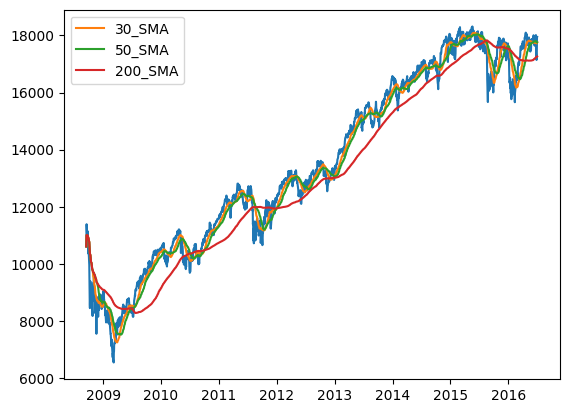

In [70]:
#have a bit issue with the x-axis
plt.plot(df_master['Date'].values, df_master['Adj Close'].values)
plt.plot(df_master['Date'].values, df_master['30_SMA'].values, label = "30_SMA")
plt.plot(df_master['Date'].values, df_master['50_SMA'].values, label = "50_SMA")
plt.plot(df_master['Date'].values, df_master['200_SMA'].values, label = "200_SMA")

plt.legend()
plt.show()




In [ ]:
#Exponential moving average (EMA)

EMAToday=( ValueToday*(Constant/ (1+No. Of Days)) )+( EMAYesterday*(1-(Constant/(1+No. Of Days))) )

In [71]:
n = 200
#decay = 2/(span+1), min required period..
df_master['EMA'] = df_master['Adj Close'].ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()

/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2660668916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['EMA'] = df_master['Adj Close'].ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()


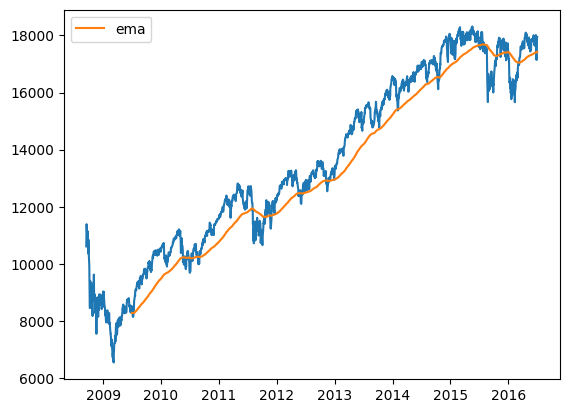

In [73]:
plt.plot(df_master['Date'].values, df_master['Adj Close'].values)
plt.plot(df_master['Date'].values, df_master['EMA'].values, label = "ema")
plt.legend()
plt.show()



In [47]:
#Bollinger Bands

In [74]:
n = 50
MA = pd.Series(df_master['Adj Close'].rolling(n).mean())
STD = pd.Series(df_master['Adj Close'].rolling(n).std())
bb1 = MA + 2*STD
df_master['Upper Bollinger Band'] = pd.Series(bb1)
bb2 = MA - 2*STD
df_master['Lower Bollinger Band'] = pd.Series(bb2)


/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/757234547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Upper Bollinger Band'] = pd.Series(bb1)
/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/757234547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Lower Bollinger Band'] = pd.Series(bb2)


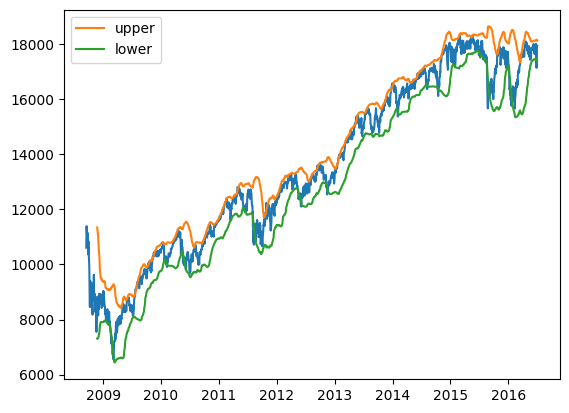

In [75]:
plt.plot(df_master['Date'].values, df_master['Adj Close'].values)
plt.plot(df_master['Date'].values, df_master['Upper Bollinger Band'].values, label = "upper")
plt.plot(df_master['Date'].values, df_master['Lower Bollinger Band'].values, label = "lower")

plt.legend()
plt.show()


#Stochastic oscillator
 The oscillator's value ranges from zero to 100 
 and is typically displayed as two lines: the %K line and the %D line, which is a moving average of %K.
 
 When the oscillator is above 80, the asset is considered overbought. Conversely, a value below 20 indicates an oversold condition. 
 
 comparing a recent closing price to its price range over a specified period
 
 To calculate the %K line, you take the difference between the most recent closing price and the lowest price of the chosen period. You then divide this difference by the difference between the highest and the lowest prices of the same period

In [76]:
n = 200
smin = df_master['Low'].rolling(n).min()
smax = df_master['High'].rolling(n).max()
df_master['stoch_k'] = 100 * (df_master['Adj Close'] - smin) / (smax - smin)
d_n = 50
df_master['stoch_d'] = df_master['stoch_k'].rolling(d_n).mean()


/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/296263236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['stoch_k'] = 100 * (df_master['Adj Close'] - smin) / (smax - smin)
/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/296263236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['stoch_d'] = df_master['stoch_k'].rolling(d_n).mean()


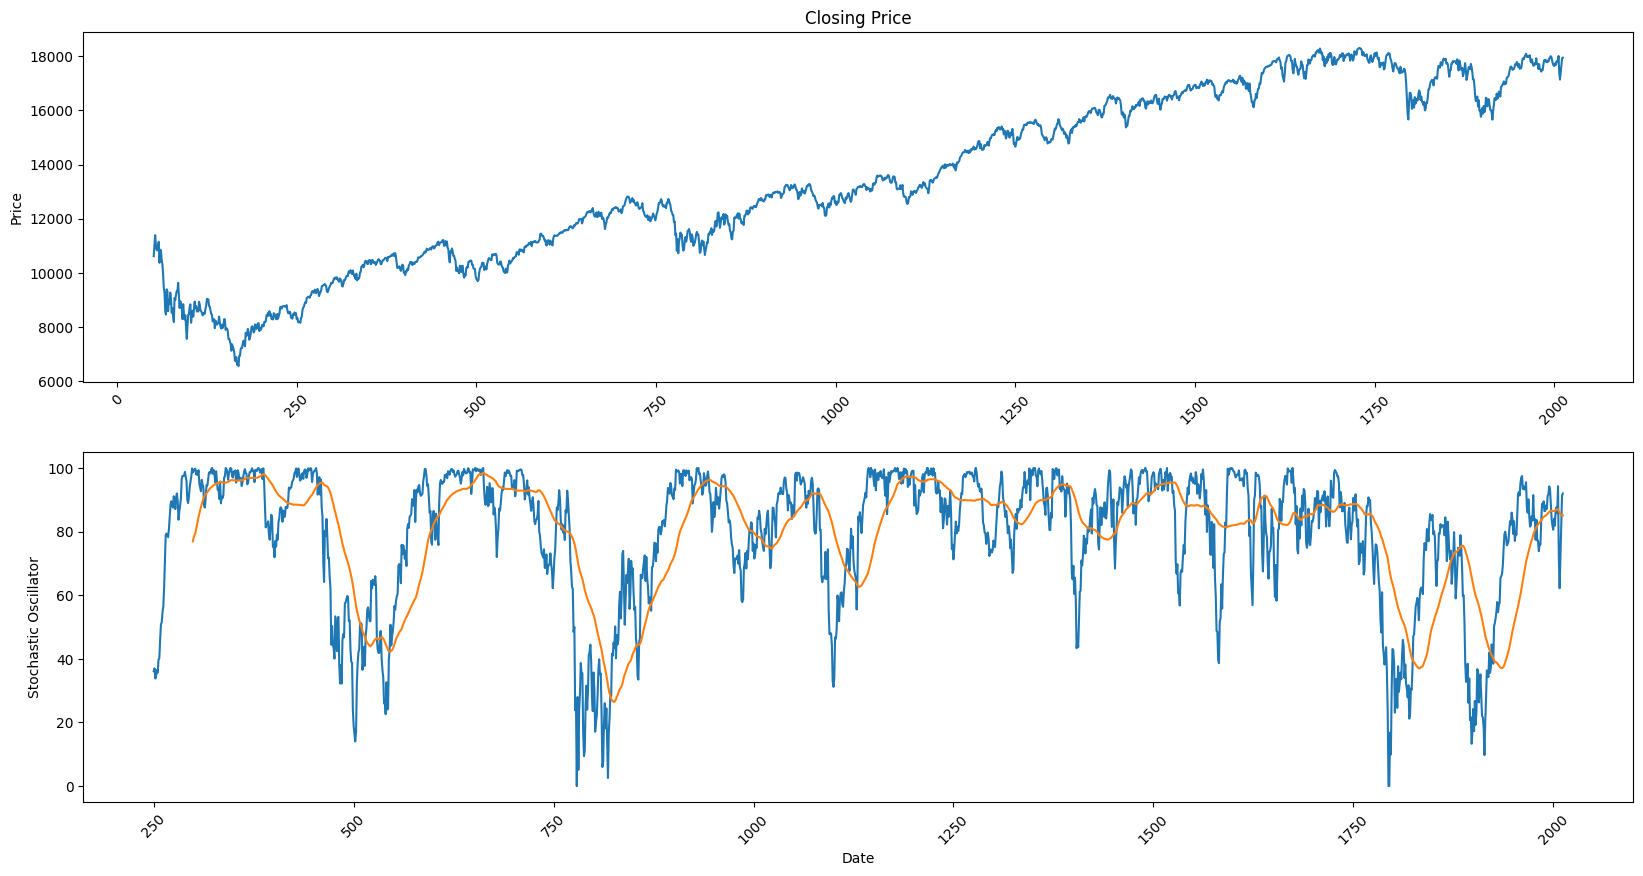

In [77]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Adj Close'])
ax1.set_title('Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df_master['stoch_k'], label='Stoch %K')
ax2.plot(df_master['stoch_d'], label='Stoch %D')
ax2.set_ylabel('Stochastic Oscillator')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)


#RSI
The RSI is commonly used to identify overbought or oversold conditions in a traded security. An RSI above 70 suggests that an asset may be overbought, indicating it could be a good time to sell. Conversely, an RSI below 30 suggests that the asset may be oversold, which could be a buying opportunity.

RS (Relative Strength) is the average of 'n' days' up closes divided by the average of 'n' days' down closes.
 

In [79]:
n = 50 # Number of period
change = df_master['Adj Close'].diff(1)
df_master['Gain'] = change.mask(change<0,0)
df_master['Loss'] = abs(change.mask(change>0,0))
df_master['AVG_Gain'] = df_master.Gain.rolling(n).mean()
df_master['AVG_Loss'] = df_master.Loss.rolling(n).mean()
df_master['RS'] = df_master['AVG_Gain']/df_master['AVG_Loss']
df_master['RSI'] = 100 - (100/(1+df_master['RS']))


/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2912052938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Gain'] = change.mask(change<0,0)
/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2912052938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Loss'] = abs(change.mask(change>0,0))
/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2912052938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Text(0.5, 0, 'Date')

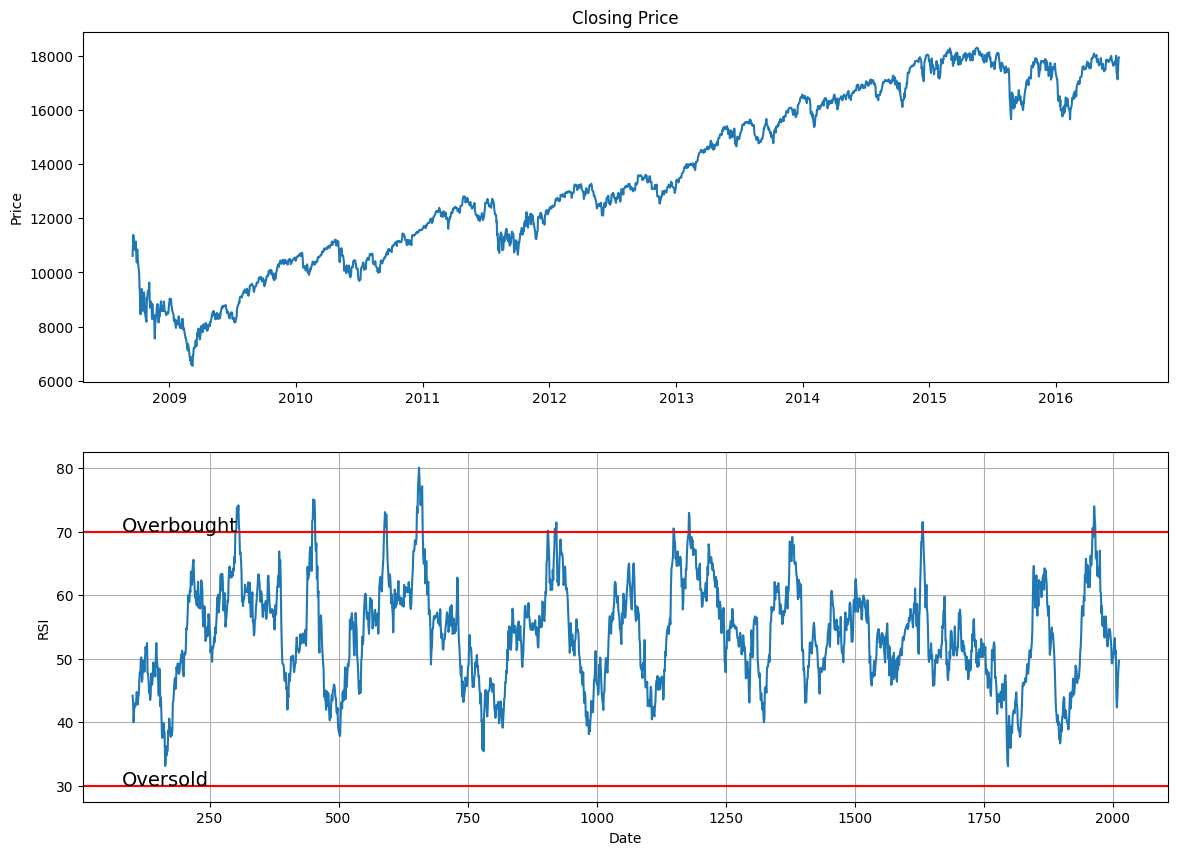

In [87]:
#df_master axis is not there
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Date'].values, df_master['Adj Close'])
ax1.set_title('Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df_master['RSI'], label='Relative Strengths Index')


#adding the text [30] -- a bit to the left
ax2.text(s='Overbought', x=df_master.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df_master.RSI.index[30], y=30, fontsize=14)

#adding horizontal axis
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')


#on balance volumne

The basic idea is that volume often precedes price movement, meaning that the level of trading activity can be an early indicator of future price trends. OBV is used to confirm price trends and identify potential reversals.

The calculation of OBV is straightforward. Starting with an initial value, you add the day's trading volume when the price closes higher than the previous day's close, and subtract the volume when the price closes lower. If the close is the same as the previous day, then the OBV remains unchanged. The formula is as follows:

1. If today's close > yesterday's close, then OBV = Previous OBV + Today's Volume
2. If today's close < yesterday's close, then OBV = Previous OBV - Today's Volume
3. If today's close = yesterday's close, then OBV = Previous OBV

When the OBV is rising, it indicates that volume is stronger on up days, suggesting bullish sentiment. Conversely, a falling OBV suggests that the volume is stronger on down days, which can be an indicator of bearish sentiment.


In [89]:
import numpy as np
df_master['obv'] = (np.sign(df_master['Adj Close'].diff()) * df_master['Volume']).fillna(0).cumsum()

/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/483700852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['obv'] = (np.sign(df_master['Adj Close'].diff()) * df_master['Volume']).fillna(0).cumsum()


Text(0.5, 0, 'Date')

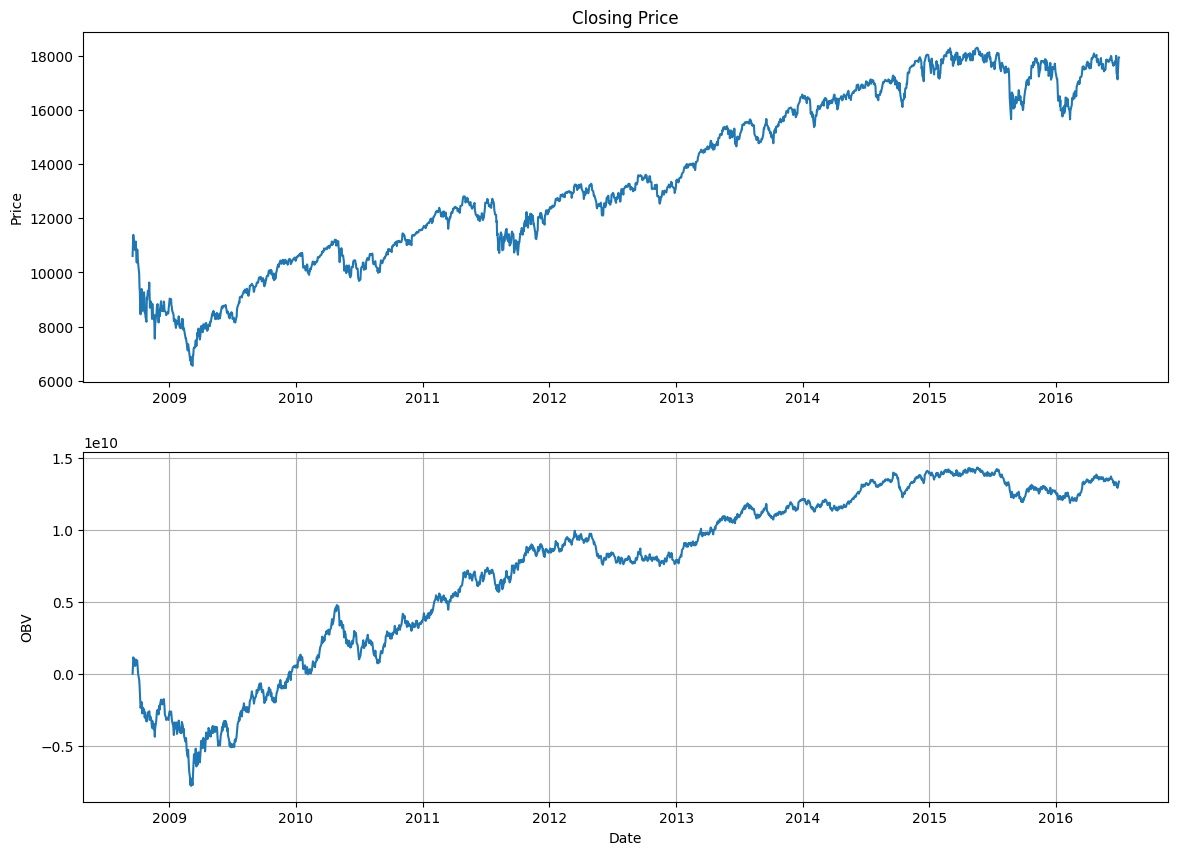

In [92]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Date'].values, df_master['Adj Close'])
ax1.set_title('Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df_master['Date'].values, df_master['obv'], label='On Balance Volume')
ax2.grid()
ax2.set_ylabel('OBV')
ax2.set_xlabel('Date')


#Volume Accumulation Oscillator (VAO)

It aims to identify instances where price moves are supported by volume, 
thereby offering a more comprehensive view of market sentiment.

The VAO is the product of the volume times the difference of the current price and the midpoint price.



In [93]:
df_master['VAO'] = df_master['Volume'] * (df_master['Adj Close'] - (df_master['High']+df_master['Low'])/2)
df_master.head()

/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2104786780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['VAO'] = df_master['Volume'] * (df_master['Adj Close'] - (df_master['High']+df_master['Low'])/2)


,Date,Open,High,Low,Close,Adj Close,Volume,percentage,z-score,Label,...,stoch_k,stoch_d,Gain,Loss,AVG_Gain,AVG_Loss,RS,RSI,obv,VAO
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-1.004889e+11
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,NaN,NaN,410.03,0.00,NaN,NaN,NaN,NaN,4.880600e+08,1.228691e+11
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,NaN,NaN,368.75,0.00,NaN,NaN,NaN,NaN,1.143170e+09,8.749977e+10
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,NaN,NaN,0.00,372.75,NaN,NaN,NaN,NaN,9.299600e+08,-3.788742e+10
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,NaN,NaN,0.00,161.52,NaN,NaN,NaN,NaN,7.254800e+08,-2.748313e+10


In [94]:
df_master['Positive'] = df_master['VAO'] > 0
#df_master['VolumePositive'] = df_master['Open'] < df_master['Adj Close']


/var/folders/6c/pglpts3544nf6ss60wb8ddc40000gn/T/ipykernel_72860/2429605435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['Positive'] = df_master['VAO'] > 0


Text(0.5, 0, 'Date')

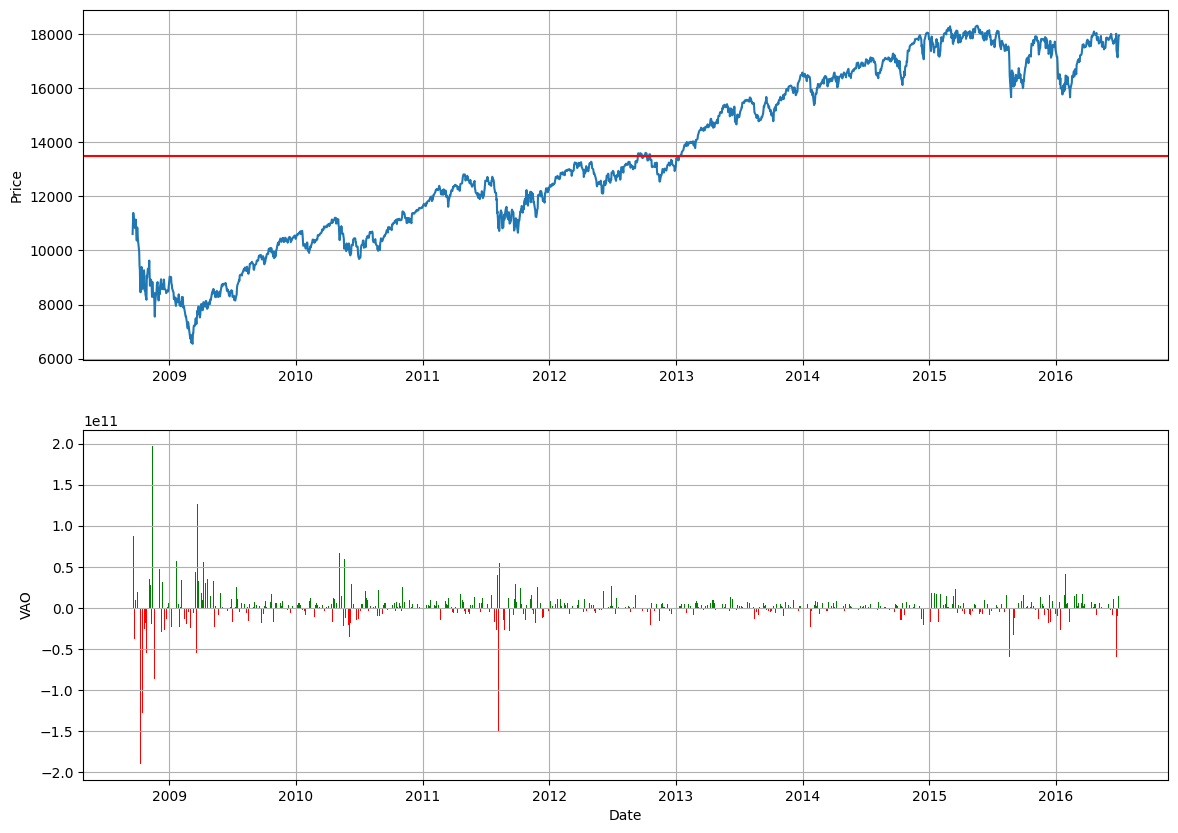

In [96]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df_master['Date'].values, df_master['Adj Close'].values)
ax1.axhline(y=df_master['Adj Close'].mean(),color='r')
ax1.grid()
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(df_master['Date'].values, df_master['VAO'].values, color=df_master.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('VAO')
ax2.set_xlabel('Date')


In [98]:
df_master.to_csv("df_master.csv")

## Tree model with enriched data

now that we have all these indicators, our plan is to use a tree model with all these technical indciators

In [3]:
#https://medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349
#very good reference

In [63]:
import pandas as pd
import numpy as np

In [99]:
df_prediction=pd.DataFrame(columns=['Date'])

In [100]:
df_master=pd.read_csv("df_master.csv", index_col=0)

In [101]:
df_master.head()

,Date,Open,High,Low,Close,Adj Close,Volume,percentage,z-score,Label,...,stoch_d,Gain,Loss,AVG_Gain,AVG_Loss,RS,RSI,obv,VAO,Positive
51,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,463200000.0,-0.040633,-3.403907,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-1.004889e+11,False
52,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,488060000.0,0.038647,-1.564634,1.0,...,NaN,410.03,0.00,NaN,NaN,NaN,NaN,4.880600e+08,1.228691e+11,True
53,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,655110000.0,0.033463,0.011810,1.0,...,NaN,368.75,0.00,NaN,NaN,NaN,NaN,1.143170e+09,8.749977e+10,True
54,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,213210000.0,-0.032731,-1.549244,0.0,...,NaN,0.00,372.75,NaN,NaN,NaN,NaN,9.299600e+08,-3.788742e+10,False
55,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,204480000.0,-0.014663,-2.108707,0.0,...,NaN,0.00,161.52,NaN,NaN,NaN,NaN,7.254800e+08,-2.748313e+10,False


In [102]:
df_master.columns

#note that we have both the sentiment and significance data points

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'percentage', 'z-score', 'Label', 'significance', 'sentiment', '30_SMA',
       '50_SMA', '200_SMA', 'EMA', 'Upper Bollinger Band',
       'Lower Bollinger Band', 'stoch_k', 'stoch_d', 'Gain', 'Loss',
       'AVG_Gain', 'AVG_Loss', 'RS', 'RSI', 'obv', 'VAO', 'Positive'],
      dtype='object')

In [9]:
#30_SMA, #50_SMA, #200_SMA, #EMA, #Upper Bollinger Band, #Lower Bollinger Band, #stoch_k, #stoch_d, #RSI, #obv,#VAO
#significance #sentiment => #percentage as the y-axis

In [104]:
df_master.head()
df_master['percentage_yesterday']=df_master['percentage']

In [105]:
# lets first shifting all the technical indicator to one lower 
# because they are calculated using the xlosing of today's data

mask = ~(df_master.columns.isin(['Date','Open', 'High', 'Low', 'Close*', 'Adj Close**', 'percentage']))

cols_to_shift = df_master.columns[mask]

df_master[cols_to_shift] = df_master.loc[:,mask].shift(1)


In [71]:
df_master.head() #look at the positive columsn, we are using yesterday's information

,Date,Open,High,Low,Close*,Adj Close**,Volume,percentage,z-score,Label,...,Loss,AVG_Gain,AVG_Loss,RS,RSI,obv,VAO,Positive,VolumePositive,percentage_yesterday
0,2008-09-17,11056.58,11057.31,10595.90,10609.66,10609.66,NaN,-0.040633,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-09-18,10609.01,11076.44,10459.44,11019.69,11019.69,463200000.0,0.038647,-3.403907,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-1.004889e+11,False,False,-0.040633
2,2008-09-19,11027.51,11483.05,11026.70,11388.44,11388.44,488060000.0,0.033463,-1.564634,1.0,...,0.00,NaN,NaN,NaN,NaN,4.880600e+08,1.228691e+11,True,True,0.038647
3,2008-09-22,11394.42,11394.58,10992.20,11015.69,11015.69,655110000.0,-0.032731,0.011810,1.0,...,0.00,NaN,NaN,NaN,NaN,1.143170e+09,8.749977e+10,True,True,0.033463
4,2008-09-23,11015.69,11143.21,10833.94,10854.17,10854.17,213210000.0,-0.014663,-1.549244,0.0,...,372.75,NaN,NaN,NaN,NaN,9.299600e+08,-3.788742e+10,False,False,-0.032731


# XGBoost Regression

In [109]:
import xgboost as xgb

In [110]:
model=xgb.XGBRegressor()

In [111]:
from sklearn.model_selection import train_test_split


In [112]:
X=df_master[['significance', 'sentiment', '30_SMA', '50_SMA', 
             '200_SMA', 'EMA', 'Upper Bollinger Band', 
             'Lower Bollinger Band', 'stoch_k', 'stoch_d', 
             'RSI', 'obv', 'VAO', 'percentage_yesterday']]

In [113]:
y=df_master[['percentage', 'Date']]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99, shuffle=False)

In [118]:
y_train

,percentage,Date
51,-0.040633,2008-09-17
52,0.038647,2008-09-18
53,0.033463,2008-09-19
54,-0.032731,2008-09-22
55,-0.014663,2008-09-23
...,...,...
1420,0.001159,2014-02-26
1421,0.004583,2014-02-27
1422,0.003015,2014-02-28
1423,-0.009416,2014-03-03


In [119]:
y_test

,percentage,Date
1425,-0.002177,2014-03-05
1426,0.003772,2014-03-06
1427,0.001877,2014-03-07
1428,-0.002069,2014-03-10
1429,-0.004107,2014-03-11
...,...,...
2008,-0.014971,2016-06-27
2009,0.015722,2016-06-28
2010,0.016368,2016-06-29
2011,0.013298,2016-06-30


In [120]:
df_prediction['Date']=y_test['Date']

In [121]:
y_test=y_test.drop(columns='Date')
y_train=y_train.drop(columns='Date')

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 51 to 1424
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   significance          1370 non-null   float64
 1   sentiment             1370 non-null   float64
 2   30_SMA                1370 non-null   float64
 3   50_SMA                1370 non-null   float64
 4   200_SMA               1370 non-null   float64
 5   EMA                   1171 non-null   float64
 6   Upper Bollinger Band  1321 non-null   float64
 7   Lower Bollinger Band  1321 non-null   float64
 8   stoch_k               1171 non-null   float64
 9   stoch_d               1122 non-null   float64
 10  RSI                   1320 non-null   float64
 11  obv                   1370 non-null   float64
 12  VAO                   1370 non-null   float64
 13  percentage_yesterday  1370 non-null   float64
dtypes: float64(14)
memory usage: 160.7 KB


In [123]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 1425 to 2012
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   significance          588 non-null    float64
 1   sentiment             588 non-null    float64
 2   30_SMA                588 non-null    float64
 3   50_SMA                588 non-null    float64
 4   200_SMA               588 non-null    float64
 5   EMA                   588 non-null    float64
 6   Upper Bollinger Band  588 non-null    float64
 7   Lower Bollinger Band  588 non-null    float64
 8   stoch_k               588 non-null    float64
 9   stoch_d               588 non-null    float64
 10  RSI                   588 non-null    float64
 11  obv                   588 non-null    float64
 12  VAO                   588 non-null    float64
 13  percentage_yesterday  588 non-null    float64
dtypes: float64(14)
memory usage: 68.9 KB


In [124]:
train_matrix=xgb.DMatrix(data=X_train, label=y_train)
test_matrix=xgb.DMatrix(data=X_test, label=y_test)

In [125]:
reg_params =  [1, 10, 100]


In [126]:
params = {"objective": "reg:squarederror"}


In [127]:
# Create an empty list for storing rmses as a function of ridge regression complexity
ridge_regression = []


In [129]:
# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg

    # Pass this updated param dictionary into cv, as pandas returning the output as dataframe
    cv_results_rmse = xgb.cv(dtrain=train_matrix, params=params, nfold=5, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

    # Append best rmse (final round)
    ridge_regression.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])



In [130]:
ridge_regression

[0.08529344483822347,
 0.08673600648241078,
 0.10108734696928612,
 0.08529344483822347,
 0.08673600648241078,
 0.10108734696928612]

In [131]:
print("Best RMSE as a function of ridge regression (L2 regularization):")
print(pd.DataFrame(list(zip(reg_params, ridge_regression)), columns=["l2", "rmse"]))


Best RMSE as a function of ridge regression (L2 regularization):
    l2      rmse
0    1  0.085293
1   10  0.086736
2  100  0.101087


In [132]:
# gets pick the best model
params = {"objective": "reg:squarederror", 
         "lambda": "1"}

bst = xgb.train(dtrain=train_matrix, params=params, num_boost_round=50)




In [133]:
prediction=bst.predict(test_matrix)

In [134]:
df_prediction['iterate_prediction']=prediction
df_prediction.head()

,Date,iterate_prediction
1425,2014-03-05,-0.000198
1426,2014-03-06,0.001123
1427,2014-03-07,0.000114
1428,2014-03-10,0.002845
1429,2014-03-11,-0.003668


In [135]:
from sklearn.metrics import mean_squared_error
print((mean_squared_error(prediction, y_test, squared=False)))


0.011854738560684308


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

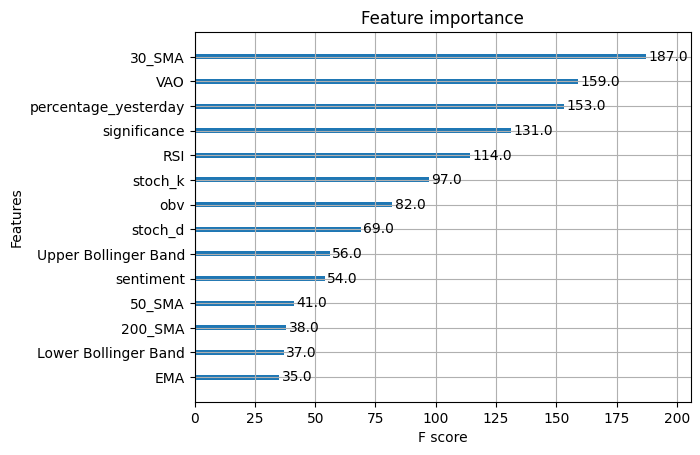

In [136]:
xgb.plot_importance(bst)


## Grid Search ##

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [138]:
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5], # the bigger, the more likely to overfit but faster to get the result
    'n_estimators': [100],  # the number of total possible parameter combination crossfold (4) x 2*4*3*3= 288
    'subsample': [0.2, 0.5, 0.8], #fraction to random sample in each training
    'max_depth': [4, 5, 6]
}


In [139]:
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")


In [140]:
grid = GridSearchCV(estimator=xg_grid_reg, param_grid=grid_search_params, scoring='neg_mean_squared_error',
                    cv=4, verbose=1)


In [141]:
grid.fit(X_train, y_train)


Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [4, 5, 6], 'n_estimators': [100],
                         'subsample': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [142]:
grid


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [4, 5, 6], 'n_estimators': [100],
                         'subsample': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [143]:
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))



Best parameters found:  {'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}
Lowest RMSE found:  0.01683927005649391


In [144]:
# gets pick the best model, no need for nestimators
params = {"objective": "reg:squarederror", 
         'colsample_bytree': 0.3, 
          'learning_rate': 0.2, 
          'max_depth': 4, 
          'subsample': 0.2
         }

bst_grid = xgb.train(dtrain=train_matrix, params=params, num_boost_round=50)


In [145]:
grid_prediction=bst_grid.predict(test_matrix)

In [146]:
grid_prediction[0:5]

array([-4.2615517e-05,  9.0705947e-04,  6.5194565e-04, -4.2088890e-05,
        9.0705947e-04], dtype=float32)

In [147]:
df_prediction['grid_prediction']=grid_prediction

In [148]:
print((mean_squared_error(grid_prediction, y_test, squared=False)))


0.00976615539828013


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

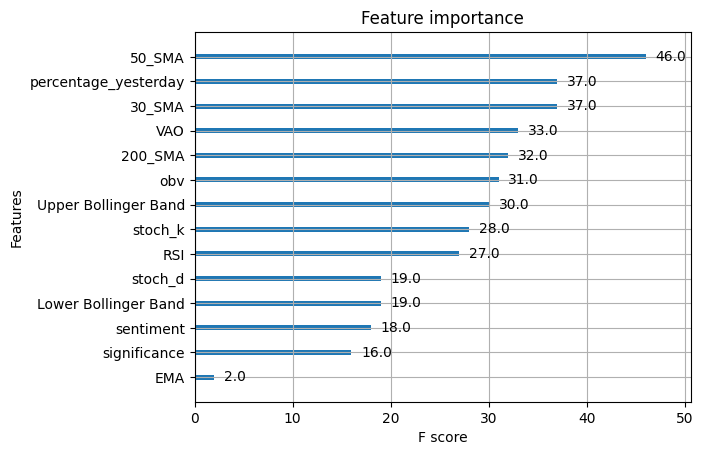

In [149]:
xgb.plot_importance(bst_grid)


## Random Search Parameters


In [151]:
params_random_search = {
    'learning_rate': np.arange(0.01, 1.01, 0.01),
    'n_estimators': [50, 100, 200],
    'max_depth': range(2, 12),
    'subsample': np.arange(0.02, 1.02, 0.02),
    'colsample_bytree': [0.3, 0.5, 0.7,1],

}


In [152]:
xg_random_reg = xgb.XGBRegressor(objective= "reg:squarederror")


In [153]:
# It calculates the mean squared error (MSE) 
#between the predicted and actual values but returns the negative value of it

#However, for error metrics like MSE, lower values are better. 
#By using the negative sign, the algorithm can still aim to maximize the metric, 
#conforming to its default behavior.
randomized_mse = RandomizedSearchCV(param_distributions=params_random_search, estimator=xg_random_reg,
                                    scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)


In [154]:
randomized_mse.fit(X_train, y_train)


Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': range(2, 12),
                                        'n_estimators': [50, 100, 200],
                                        'subsample': array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])},
                   scoring='neg_mean_squared_error', verbose=1)

In [155]:
print("Randomize Search Cross Validation")
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))


Randomize Search Cross Validation
Best parameters found:  {'subsample': 0.28, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.53, 'colsample_bytree': 0.7}
Lowest RMSE found:  0.024681445990788264


In [156]:
# gets pick the best model, no need for nestimators
params = {"objective": "reg:squarederror", 
         'subsample': 0.28,  'max_depth': 7, 'learning_rate': 0.53, 'colsample_bytree': 0.7
         }

#num_boost_round is a parameter in XGBoost, 
#a popular machine learning library for gradient boosting. 
#This parameter specifies the number of boosting rounds or trees to build. 
#Each round adds a new tree to the model, 
#attempting to correct errors made by the existing ensemble of trees.

bst_random = xgb.train(dtrain=train_matrix, params=params, num_boost_round=50)

In [157]:
random_prediction=bst_random.predict(test_matrix)

In [158]:
df_prediction['random_prediction']=random_prediction

In [159]:
print((mean_squared_error(random_prediction, y_test, squared=False)))


0.018714841671360283


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

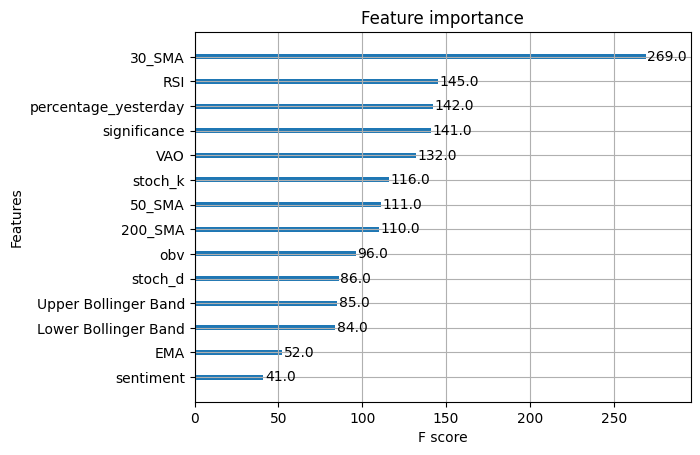

In [160]:
xgb.plot_importance(bst_random)

In [161]:
df_prediction.to_csv("prediction_output.csv")